#### Credit Risk Analysis 
Financial markets are fundamental institutions in any developing economy. They
play a crucial role in promoting economic growth by facilitating the channeling of
saving decisions into productive investment. A major concern for financial
institutions is credit risk, because if not managed properly, it can lead to a
banking collapse.   
Loan is the core business part of banks.
A bank's profit or a loss depends to a large extent on loans i.e. whether the
customers are paying back the loan or defaulting.  


  **Here we are trying to find which features are responsible for default and repayment of loans** 

In [1]:
#importing required libraraies
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df=pd.read_csv("data/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.shape

(32581, 12)

In [4]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


- **Here we observe that our data has 32581 rows and 12 columns out of which 4 are categorical and 8 are numerical.**  
- **There are 895 missing rows in person_emp_length column and 3116 missing rows in loan_int_rate column**

##### filling the missing values
- **For the person_emp_length column we are replacing the missing values with the median because of presence of outliers.**
- **For loan_in_rate column we are filling with the median because there are 70 outliers in that column.**

In [8]:
##filling missing values--for person_emp_length_column
df["person_emp_length"]=df["person_emp_length"].fillna(df["person_emp_length"].median())
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
#filing missing values for---loan_int_rate column
df["loan_int_rate"]=df["loan_int_rate"].fillna(df["loan_int_rate"].median())
df.isnull().sum() 

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [10]:
#separating the numerical and categorical columns into two different lists.
cat_columns=[] 
num_columns=[]
for i in df.columns:
    if df[i].dtype=="O":
        cat_columns.append(i)
    else:
        num_columns.append(i)
print("Categorical Columns list : \n ",cat_columns)
print("Numerical Columns list : \n ",num_columns) 

Categorical Columns list : 
  ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
Numerical Columns list : 
  ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


#### CREATING VARIOUS FUNCTIONS FOR DIFFRENT OPERATIONS

In [31]:
## CREATING A FUNCTION TO CALCULATE UPPER WHISKER  AND LOWER WHISKER RANGE 
def iqr(column): 
    q3=df[column].quantile(0.75)
    q1=df[column].quantile(0.25)
    iqr=q3-q1
    upper_boundary=q3+1.5*iqr
    lower_boundary=q1-1.5*iqr 
    return upper_boundary,lower_boundary 


##FUNCTION FOR UNIVARIATE ANALYSIS OF NUMERICAL COLUMNS
def num_stat(column):
    if column=="loan_status":
        print("The count of customers who defaulted is : ",df[column].sum())
        print("\n")
        plt.figure(figsize=(8,4))
        plt.subplot(1,2,1)
        sns.countplot(data=df,y=column)
        plt.subplot(1,2,2)
        df[column].value_counts().plot.pie(autopct="%0.0f")
    else:
        print(f"The minimum value  of column {column}  :",df[column].min())
        print(f"The maximum value of column {column}  :",df[column].max())
        print(f"The average value  of column {column}  :",df[column].mean())
        print(f"The median value is of column {column}  :",df[column].median())
        print(f"The standard deviation of column {column}  :",df[column].std())
        print("=============================")
    
    plt.figure(figsize=(8,6))
    plt.subplot(2,1,1)
    sns.distplot(df[column])
    plt.subplot(2,1,2)
    sns.boxplot(data=df,x=column)  

    
#FUNCTION FOR UNIVARIATE ANALYSIS  OF CATEGORICAL COLUMNS    
def cat_stat(column):
    print(f"For the {column} \n ",df[column].value_counts())
    print("\n")
    
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.countplot(data=df,y=column)
    plt.subplot(1,2,2) 
    df[column].value_counts().plot.pie(autopct="%0.0f") 
    plt.tight_layout() 


In [32]:
#CREATING A DICTIONARY FOR UPPER AND LOWER BOUNDARY OF NUMERICAL FEATURES
#HERE UPPER AND LOWER MEANS UPPER WHISKER AND LOWER WHISKER CALCULATED USING IQR
di_boundary={}
for i in num_columns:
    if i=="loan_status":
        pass
    else: 
        upper,lower=iqr(i)##CALLING iqr() function here
        di_boundary[i]=[upper,lower]
print("Upper and lower boundaries of columns : ",di_boundary) 
print("\n")


##creating a dictionary with counts of outliers in each column
di_outliers={}
for feature in num_columns:
    if feature=="loan_status":
        pass
    else:
        counts= df[(df[feature]>di_boundary[feature][0])|(df[feature]<di_boundary[feature][1])][feature].count()
        di_outliers[feature]=counts 
print("=========================================")
print("Number of outliers : ",di_outliers)

Upper and lower boundaries of columns :  {'person_age': [40.5, 12.5], 'person_income': [140250.0, -22550.0], 'person_emp_length': [14.5, -5.5], 'loan_amnt': [23000.0, -5800.0], 'loan_int_rate': [20.04, 1.5600000000000014], 'loan_percent_income': [0.44000000000000006, -0.12000000000000002], 'cb_person_cred_hist_length': [15.5, -4.5]}


Number of outliers :  {'person_age': 1494, 'person_income': 1484, 'person_emp_length': 853, 'loan_amnt': 1689, 'loan_int_rate': 70, 'loan_percent_income': 651, 'cb_person_cred_hist_length': 1142}


#### UNIVARIATE ANALYSIS AND PLOTTING OF ALL THE FEATURES

The minimum value  of column person_age  : 20
The maximum value of column person_age  : 144
The average value  of column person_age  : 27.73459992019889
The median value is of column person_age  : 26.0
The standard deviation of column person_age  : 6.3480784192252475
The minimum value  of column person_income  : 4000
The maximum value of column person_income  : 6000000
The average value  of column person_income  : 66074.84846996715
The median value is of column person_income  : 55000.0
The standard deviation of column person_income  : 61983.119168159064
The minimum value  of column person_emp_length  : 0.0
The maximum value of column person_emp_length  : 123.0
The average value  of column person_emp_length  : 4.767993615911114
The median value is of column person_emp_length  : 4.0
The standard deviation of column person_emp_length  : 4.087371678206524
The minimum value  of column loan_amnt  : 500
The maximum value of column loan_amnt  : 35000
The average value  of column loan_amnt  : 9

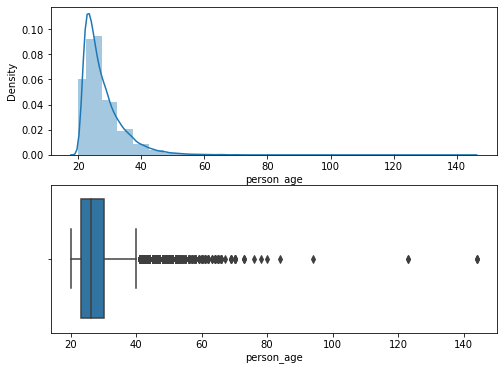

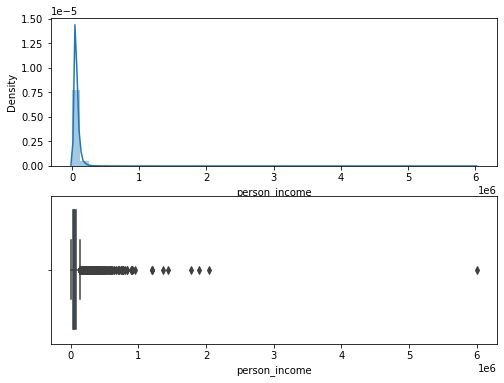

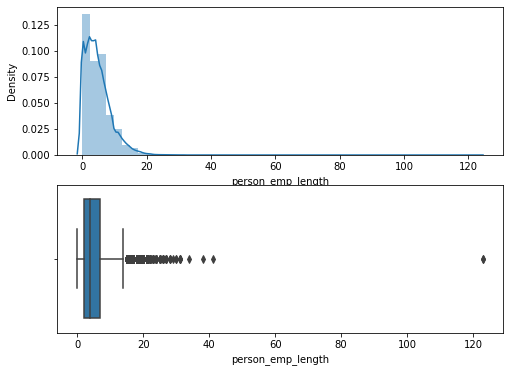

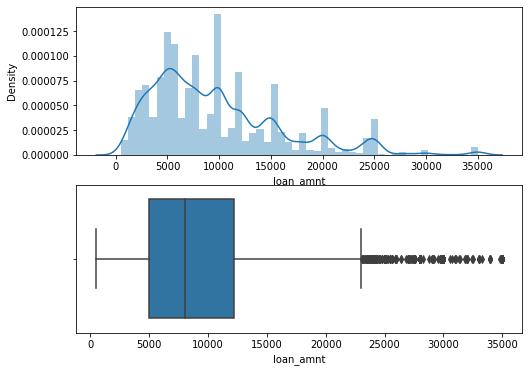

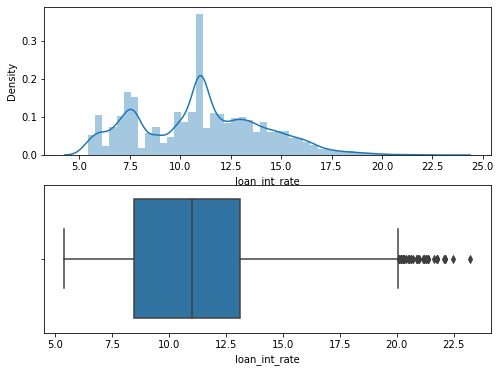

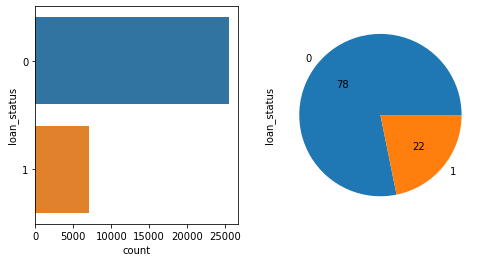

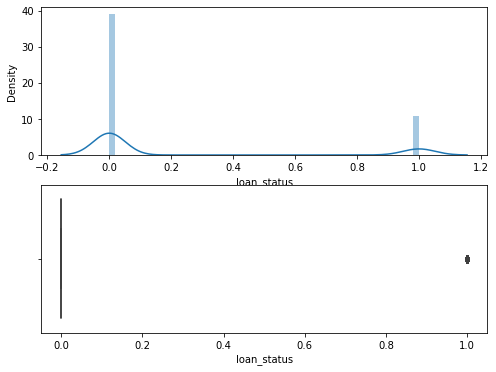

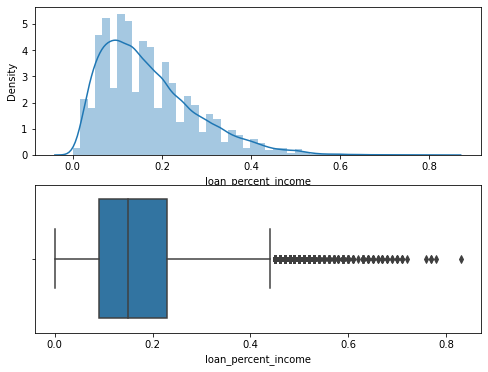

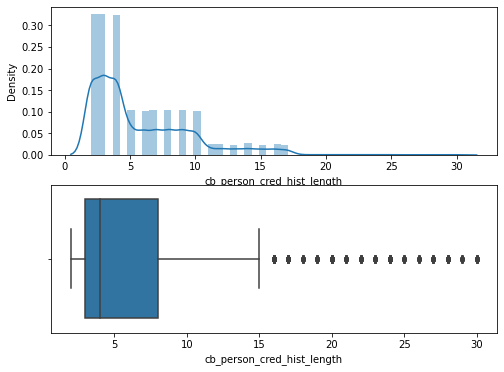

In [33]:
#plotting all the numerical columns
for i in num_columns:
    num_stat(i)

#### `OBSERVATION` 
- **PERSON_AGE:The distribution of person_age column is right skewed as there are 1494 outliers.Most of the persons have age between 20 to 30.The median value is 26,maximum is 144 and minimum is 20.** 
- **PERSON_INCOME:Most of the people have annual income less than 50,000.The average value is 66074,median value value is 5500,min value is 4000 and maximum is 6 million.The distribution is right skewed with 1484 outliers.**
- **PERSON_EMP_LENGTH:Maximum number of people have employment length less than 10 years.There are 853 outliers.**
- **LOAN_AMT:The distribution of loan_amt column is right skewed with discrepancies .The average value is 9589,median value is 8000 and maximum loan_amt is 35000.** 
- **LOAN_STATUS:Out of 32581 people 22% of them have defaulted.**
- **LOAN_INT_RATE:The distribution varies and roughly follows normal distribution.This feature has only 70 outliers.10-12% int_rate are maximum in numbers.** 
- **LOAN_PERCENT_INCOME:The distribution is right skewed  with an average of 0.17,median 0.15 and 651 number of outliers.** 
- **LOAN_PERCENT_INCOME:The distribution is right skewed with 651 outliers.The average value is 0.17 and 0.15.**
- **CB_PERSON_CRED_HIST_LENGTH:There are 442 outliers .Most of people have credit history length less than 5.Very few people have greater than 10 credit history length.The average of this feature is 5 and the median value is 4.**

For the person_home_ownership 
  RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64


For the loan_intent 
  EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64


For the loan_grade 
  A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64


For the cb_person_default_on_file 
  N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64




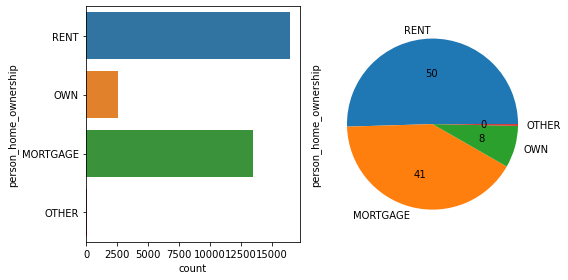

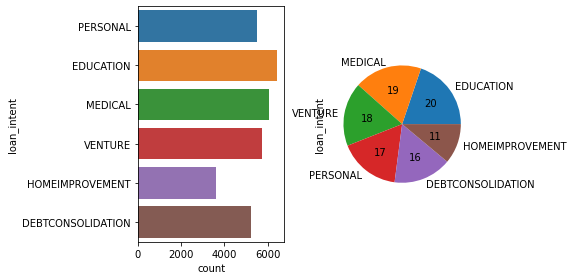

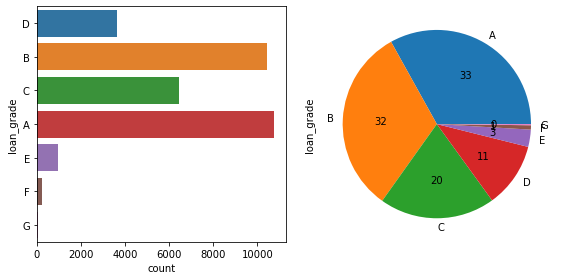

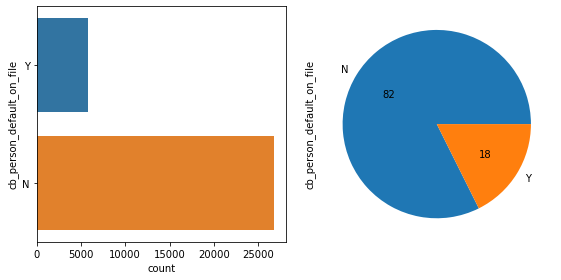

In [34]:
#plotting all the categorical columns
for i in cat_columns:
    cat_stat(i)

#### `OBSERVATION` 
- **PERSON_HOME_OWNERSHIP:50% of the people are living in rented house,41% live in mortgage,8% of people have their own house.**
- **LOAN_INTENT:Medical,Education,venture,personal have equal distribution.Medical and Education have highest percentage.Home improvement have lowest percentage of 11%.** 
- **LOAN_GRADE:Grade A has 33%,B has 32% which has highest.E has 3% and G has 0% which has lowest.**
- **CB_PERSON_DEFAULT_ON_FILE:82% have N and 18% have Y.** 

## BIVARIATE  AND MULTIVARIATE ANALYSIS-to analyse the relationship of various features with loan_status

#### LOAN_STATUS VS CATEGORICAL  FEATURES

In [35]:
cat_columns

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

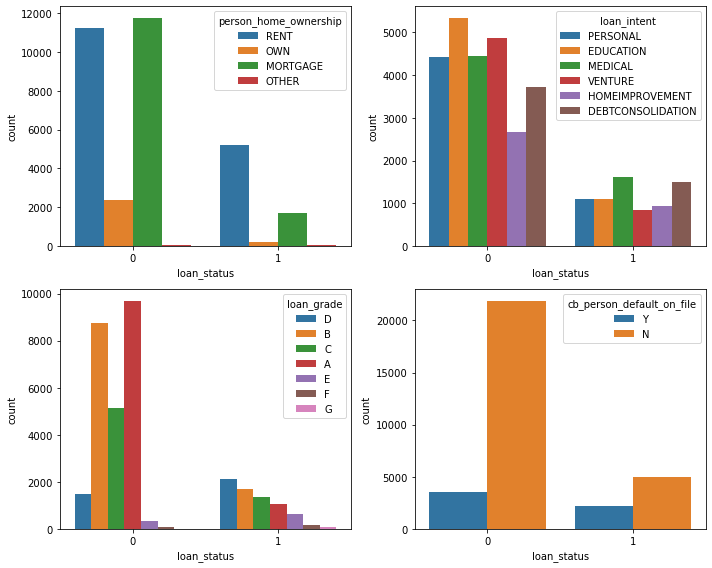

In [36]:
plt.figure(figsize=(10,8))
n=1
for i in cat_columns:
    plt.subplot(2,2,n)
    sns.countplot(data=df,x="loan_status",hue=i)
    n=n+1 
    
plt.tight_layout()

#### LOAN_STATUS VS NUMERICAL FEATURE

In [37]:
num_columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

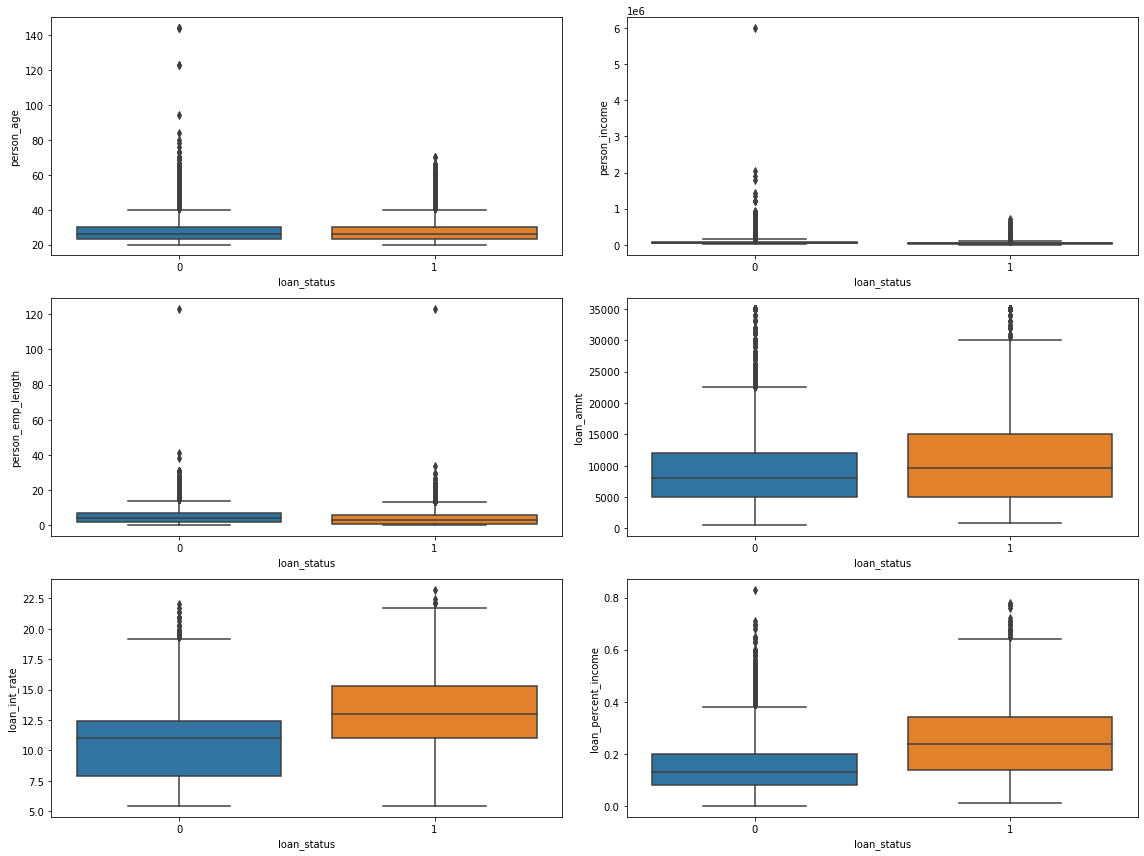

In [38]:
plt.figure(figsize=(16,12))
n=1
for i in num_columns:
    if i=="loan_status" or i=="cb_person_cred_hist_length":
        pass
    else:
        plt.subplot(3,2,n)
        sns.boxplot(data=df,x="loan_status",y=i)
        n=n+1 

plt.tight_layout() 

<AxesSubplot:xlabel='count', ylabel='cb_person_cred_hist_length'>

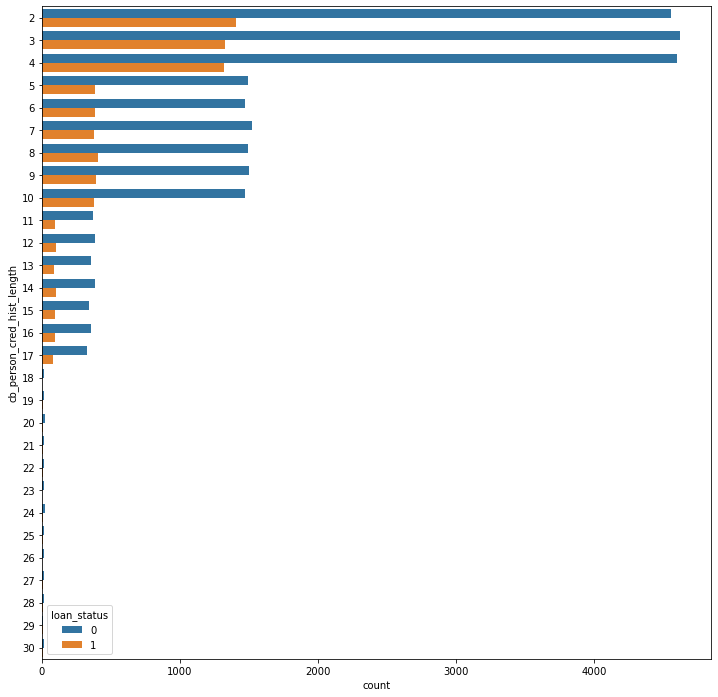

In [11]:
#calculating credit history vs loan_status
plt.figure(figsize=(12,12))
sns.countplot(data=df,y="cb_person_cred_hist_length",hue="loan_status")

#### `OBSERVATIONS`
- **People living in rented places have defaulted more than the rest.Those who have own houses have defaulted least.**
- **People in Grade D have defaulted highest.People belonging to grade A are highest in number for non defaulting.**
- **People having no historical default are more likely to repay the loan than people with historical default.**
- **Those having higher loan amount are more likely to default.**
- **The defaulters increases with the increase in loan interest rate.**
- **If the loan percent income is high there is more likely chance of defaulting.**
- **People having credit history of 2 or 3 have the highest chances of defaulting.Those having credit history of above 10 are less likely to default.**

#### CORRELATION BETWEEN VARIOUS NUMERICAL FEATURES

<AxesSubplot:>

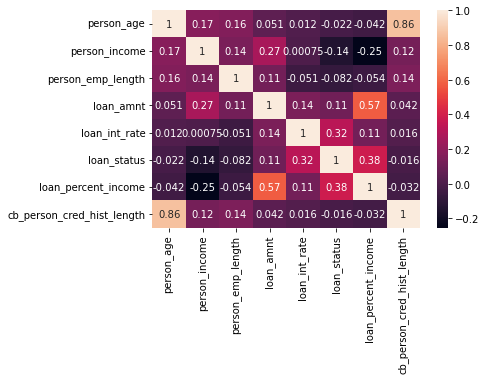

In [40]:
sns.heatmap(df.corr(),annot=True)

###### Here we can see that a persons credit history length has strong positive correlation between age.If the age is high then the credit history is also high
###### The loan amt is also having a positive correleation with the loan_percent_income.If the loan amt increases then the loan_percent also increases. 

# `RECOMMENDATIONS` 

- **Those having own house are less likely to default**
- **Credit history of a person shild be checked if it lies below 10 there are higher chances of him to default.**
- **Loan interest rates are more likely to impact the defaulting of people.For loans whose interest are higher the persons credibility should be checked because there are higher chances of him to default.** 
- **Loan amount also greatly affects the defaulting.Banks should check the loan amount provided because if the loan amount is high then the person is more lokey to default.** 
- **People belonging to Grade D should be checked also because they are having more chances to default.** 
- **Default history of a person greatly impacts the repayment.If the person has no default history then it is more likely that he will pay back the loan.**